<a href="https://colab.research.google.com/github/farisnanosoft/emotion-analytics-cnn/blob/main/emo_prepro%2Bcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2
import glob
import re
#f2=np.array(f["train_set_x"])
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from PIL import Image
import scipy.misc
from scipy import ndimage
import re
import h5py

In [ ]:
#kdef_train_image_path=sorted(glob.glob("Downloads/DL/DL dataset/KDEF_kaggle_emo/KDEF/train/*.jpg"),key=lambda x:float(re.findall("([0-9]+?)\.jpg",x)[0]))
#kdef_valid_image_path=sorted(glob.glob("Downloads/DL/DL dataset/KDEF_kaggle_emo/KDEF/valid/*.jpg"),key=lambda x:float(re.findall("([0-9]+?)\.jpg",x)[0]))
#kdef_test_image_path=sorted(glob.glob("Downloads/DL/DL dataset/KDEF_kaggle_emo/KDEF/test/*.jpg"),key=lambda x:float(re.findall("([0-9]+?)\.jpg",x)[0]))
kdef_train_image_path=glob.glob("Downloads/DL/DL dataset/KDEF_kaggle_emo/KDEF/train/*.jpg")
kdef_valid_image_path=glob.glob("Downloads/DL/DL dataset/KDEF_kaggle_emo/KDEF/valid/*.jpg")
kdef_test_image_path=glob.glob("Downloads/DL/DL dataset/KDEF_kaggle_emo/KDEF/test/*.jpg")
def create_image_array(seq_image_path):
    dataset_x=[]
    dataset_y=[]
    for i,img_path in enumerate(seq_image_path):
        #img = image.load_img(img_path,target_size=(224, 224))
        e_word=re.findall("([\w][\w]?)\.jpg",img_path)
        if e_word[0]=="AN":
            e_num=0
        elif e_word[0]=="DI":
            e_num=1
        elif e_word[0]=="AF":
            e_num=2
        elif e_word[0]=="HA":
            e_num=3
        elif e_word[0]=="SA":
            e_num=4
        elif e_word[0]=="SU":
            e_num=5
        elif e_word[0]=="NE":
            e_num=6
        else:
            print("invalid emo")
        #print(e_num)
        dataset_y.append(e_num)
        #--x=np.array(img)
        #--x=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
        #--img=Image.open(img_path)
        #--img = image.img_to_array(img)
        #--x=Image.fromarray(img)
        img=mpimg.imread(img_path)
        img=scipy.misc.imresize(img,(224,224))
        dataset_x.append(img)
    dataset_x=np.array(dataset_x)
    dataset_y=np.array(dataset_y).astype(int)
    return dataset_x,dataset_y

In [ ]:
train_orig_x,train_orig_y=create_image_array(kdef_train_image_path)
valid_orig_x,valid_orig_y=create_image_array(kdef_valid_image_path)
test_orig_x,test_orig_y=create_image_array(kdef_test_image_path)

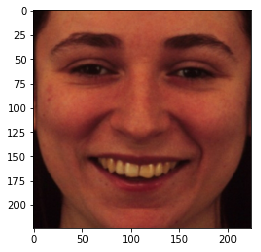

In [ ]:
imshow(train_orig_x[101])

In [ ]:
#shape_tr_x=np.shape(train_orig_x)
#shape_tr_x=(1,shape_tr_x[1:4])
#shape_tr_y=np.shape(train_orig_y)
#shape_v_x=np.shape(valid_orig_x)
#shape_v_y=np.shape(valid_orig_y)
#shape_t_x=np.shape(test_orig_x)
#shape_t_y=np.shape(test_orig_y)
with h5py.File("kdef_emo_dataset.h5", "w") as hf:
    hf.create_dataset("train_orig_x",data=train_orig_x,compression="gzip",compression_opts=9)
    hf.create_dataset("train_orig_y",data=train_orig_y)
    hf.create_dataset("valid_orig_x",data=valid_orig_x,compression="gzip",compression_opts=9)
    hf.create_dataset("valid_orig_y",data=valid_orig_y)
    hf.create_dataset("test_orig_x",data=test_orig_x,compression="gzip",compression_opts=9)
    hf.create_dataset("test_orig_y",data=test_orig_y)

5


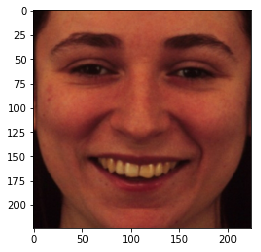

In [ ]:
hf=h5py.File("kdef_emo_dataset.h5", "r")
print(hf["valid_orig_y"][20])
imshow(hf["train_orig_x"][101])
hf.close()

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, regularizers
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import time
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
K.clear_session()

In [ ]:
model_final=load_model('model_emo_vgg16.h5')

In [ ]:
def emo_recog(im_recog):
    frame_recog=im_recog
    cv2_im=cv2.cvtColor(frame_recog,cv2.COLOR_BGR2RGB)
    pil_im=Image.fromarray(cv2_im)
#    x = pil_im.resize((224,224), Image.BICUBIC)
    x = np.array(pil_im, dtype='float32')
    x /= 255.
    x = np.expand_dims(x, axis=0)
    preds=model_final.predict(x)
    #probabs=np.max(preds)
    probabs=preds
    pos=np.argmax(preds)
    #time.sleep(1)
    return pos,probabs

In [ ]:
#frame = cv2.imread(l)
#frame = imutils.resize(frame, width=400)
y_classes=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")
cap = cv2.VideoCapture(0)
# grab the frame dimensions and convert it to a blob
while(True):
    ret, frame = cap.read()
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))

    # pass the blob through the network and obtain the detections and
    # predictions
    net.setInput(blob)
    detections = net.forward()
    # loop over the detections

    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence < 0.5:
            #print(confidence)
            continue

        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    #		print(box)
        (startX, startY, endX, endY) = box.astype("int")
        #print(startX, startY, endX, endY)

        # draw the bounding box of the face along with the associated
        # probability
        y = startY - 10 if startY - 10 > 10 else startY + 10
        crop_img = frame[startY:endY, startX:endX]
        im_x,im_y,im_z=np.shape(crop_img)
    #cr_x_s=round(im_x*.55)
    #cr_x_e=(im_x-1)
    #cr_y_s=round(im_y*.08)
    #cr_y_e=round(im_y*.91)

    #crop_m=crop_img[cr_x_s:cr_x_e, cr_y_s:cr_y_e]
        try:
            crop_r=cv2.resize(crop_img, (224,224))
        except:
            break
        pos,probabs=emo_recog(crop_r)
        #print(preds)
        #orig=frame
        text = "{}".format(y_classes[pos])
        cv2.rectangle(frame, (startX, startY), (endX, endY),
            (255, 0, 0), 2)
        for i in range(len(probabs[0])):
            line_start_x=int(round((startX+endX)/2))
            line_end_x=int(round((startX+endX)/2+(endX-startX)*probabs[0][i]/2))
            #print((y-12*len(probabs[0])))
            if (y-12*len(probabs[0]))<=0:
                text_y=endY+12*i+20
                line_y=endY+3+12*i+15
            else:
                line_y=y-3-12*i
                text_y=y-12*i
            cv2.line(frame,(line_start_x, line_y),(line_end_x, line_y),(0, 255, 0), 2)
            cv2.putText(frame, y_classes[i], (startX, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0+30*i, 0+20*i, 255), 1)
        #cv2.putText(frame, text, (startX, y),
         #   cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

        #cv2.putText(orig, "Label: {}".format(preds),
        #    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv2.imshow('frame',frame)
        #cv2.imshow("Frame", crop_r)
        # do a bit of cleanup

        #cv2.waitKey()
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
y_classes=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")
frame=cv2.imread("images/test6.jpg")
frame=cv2.resize(frame,(710,473))
(h, w) = frame.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
    (300, 300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()
# loop over the detections

for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence < 0.5:
        #print(confidence)
        continue

    # compute the (x, y)-coordinates of the bounding box for the
    # object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#		print(box)
    (startX, startY, endX, endY) = box.astype("int")
    #print(startX, startY, endX, endY)

    # draw the bounding box of the face along with the associated
    # probability
    y = startY - 10 if startY - 10 > 10 else startY + 10
    crop_img = frame[startY:endY, startX:endX]
    im_x,im_y,im_z=np.shape(crop_img)
#cr_x_s=round(im_x*.55)
#cr_x_e=(im_x-1)
#cr_y_s=round(im_y*.08)
#cr_y_e=round(im_y*.91)

#crop_m=crop_img[cr_x_s:cr_x_e, cr_y_s:cr_y_e]
    try:
        crop_r=cv2.resize(crop_img, (224,224))
    except:
        break
    pos,probabs=emo_recog(crop_r)
    #print(probabs)
    #probabs=np.max(probabs)
    #print(preds)
    #orig=frame

    #text = y_classes[pos]
    cv2.rectangle(frame, (startX, startY), (endX, endY),
        (255, 0, 0), 2)
    for i in range(len(probabs[0])):
        line_start_x=int(round((startX+endX)/2))
        line_end_x=int(round((startX+endX)/2+(endX-startX)*probabs[0][i]/2))
        #print((y-12*len(probabs[0])))
        if (y-12*len(probabs[0]))<=0:
            text_y=endY+12*i+20
            line_y=endY+3+12*i+15
        else:
            line_y=y-3-12*i
            text_y=y-12*i
        cv2.line(frame,(line_start_x, line_y),(line_end_x, line_y),(0, 255, 0), 2)
        cv2.putText(frame, y_classes[i], (startX, text_y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0+30*i, 0+20*i, 255), 1)
    #cv2.putText(frame, text, (startX, y),
    #    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    #cv2.putText(orig, "Label: {}".format(preds),
    #    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
cv2.imshow('frame',frame)
    #cv2.imshow("Frame", crop_r)
    # do a bit of cleanup

cv2.waitKey()
    #key = cv2.waitKey(1) & 0xFF
    #if key == ord("q"):
     #   break

48
48
48
48
48
48
48
104
104
104
104
104
104
104
-26
-26
-26
-26
-26
-26
-26


-1